<a href="https://colab.research.google.com/github/IrVallejo/time_series/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

In [2]:
X, y = load_iris(return_X_y=True, as_frame=True)
df_raw = pd.concat([X, y], axis=1)
df_raw.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
12,4.8,3.0,1.4,0.1,0
33,5.5,4.2,1.4,0.2,0
144,6.7,3.3,5.7,2.5,2
104,6.5,3.0,5.8,2.2,2
111,6.4,2.7,5.3,1.9,2
100,6.3,3.3,6.0,2.5,2
97,6.2,2.9,4.3,1.3,1
18,5.7,3.8,1.7,0.3,0
72,6.3,2.5,4.9,1.5,1
93,5.0,2.3,3.3,1.0,1


**1ra condicion**
Para correr TensorFlow el 'target' dever ser numerico

**2da Condicion**
- Los datos deven estar escalado (en lo posible)
- Si los datos tienens una forma parecida a la normal utilizar StandarScaler
- Si tiene sesgo o presetan una distribucion no uniforme, usar MinMaxScaler

In [3]:
df = df_raw.copy()

df_train, df_test = train_test_split(df, test_size=0.2, random_state=2024)

X_train = df_train.drop('target', axis =1).reset_index(drop=True)
y_train = df_train['target'].reset_index(drop=True)
X_test = df_test.drop('target', axis =1).reset_index(drop=True)
y_test = df_test['target'].reset_index(drop=True)

In [4]:
X_train_scaler = X_train.copy()
X_test_scaler = X_test.copy()

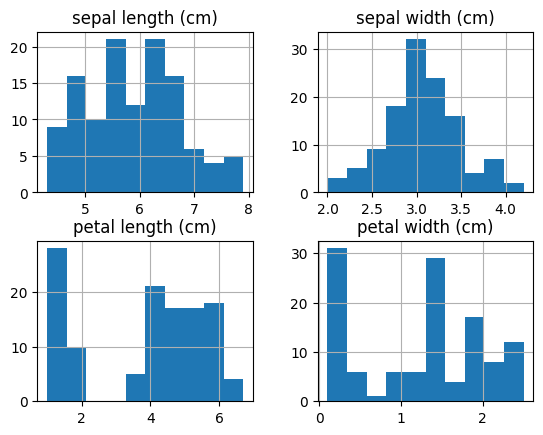

In [5]:
X_train.hist()
plt.show()

In [6]:
#Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
#Create neural network
model = Sequential([
    Dense(64, input_shape=(X_train_scaler.shape[1], ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  #softmax calcula el de mayor probabilidad
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data = (X_test_scaler, y_test))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.2869 - loss: 1.1516 - val_accuracy: 0.3333 - val_loss: 1.6037
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4483 - loss: 1.0422 - val_accuracy: 0.3333 - val_loss: 1.8142
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6087 - loss: 0.9577 - val_accuracy: 0.3333 - val_loss: 2.0947
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8096 - loss: 0.8591 - val_accuracy: 0.3333 - val_loss: 2.3780
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8285 - loss: 0.7851 - val_accuracy: 0.3333 - val_loss: 2.6485
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8110 - loss: 0.7335 - val_accuracy: 0.3333 - val_loss: 2.8854
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7923 - loss: 0.7050 - val_accuracy: 0.3333 - val_loss: 3.0754
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7998 - loss: 0.6618 - val_accuracy: 0.3333 - val_loss: 3.2399


In [10]:
#Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.8333 - loss: 0.3182
Loss: 0.3182344436645508, Accuracy: 0.8333333134651184


In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean-pima-indians-diabetes.csv')
df.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'target']
df.sample(10)

,x1,x2,x3,x4,x5,x6,x7,x8,target
176,0.639947,-1.123396,0.459827,-1.288212,-0.692891,-0.100593,-0.271437,0.745293,0
650,-0.844885,-0.935613,-0.780919,0.279989,0.175399,-0.862109,-0.718415,-0.871374,0
759,0.639947,2.162804,1.183596,-1.288212,-0.692891,0.445159,-0.585529,2.787399,1
172,-0.547919,-1.060802,-3.572597,0.154533,-0.692891,-0.392508,0.909429,-0.701198,0
136,-1.141852,-0.653939,0.046245,0.342717,-0.258746,-0.151361,0.377888,-1.041549,0
447,-1.141852,-0.810425,0.563223,1.534551,0.105936,0.572079,-0.428483,-0.616111,0
393,0.046014,-0.153185,0.149641,-0.535475,0.062521,-1.255559,-0.026807,0.319855,0
760,-0.547919,-1.029505,-0.574128,0.342717,-0.553964,-0.455967,0.888288,-0.956462,0
149,-0.547919,-0.966911,0.046245,-0.221835,-0.692891,-0.595578,-1.168412,-0.956462,0
647,-1.141852,1.818535,-0.987710,0.969998,0.687690,0.737074,-0.050968,-0.956462,1


In [12]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=2024)

In [13]:
X_train = df_train.drop('target', axis =1).reset_index(drop=True)
y_train = df_train['target'].reset_index(drop=True)
X_test = df_test.drop('target', axis =1).reset_index(drop=True)
y_test = df_test['target'].reset_index(drop=True)

In [14]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
x1,614.0,-0.012992,0.992403,-1.141852,-0.844885,-0.250952,0.639947,3.906578
x2,614.0,0.015891,1.021084,-3.783654,-0.685236,-0.090591,0.652717,2.444478
x3,614.0,0.018123,1.048340,-3.572597,-0.263941,0.149641,0.563223,2.734528
x4,614.0,0.011301,0.989202,-1.288212,-1.288212,0.154533,0.766132,2.663656
x5,614.0,0.009971,1.004505,-0.692891,-0.692891,-0.397672,0.392471,5.767184
x6,614.0,0.012125,1.029201,-4.060474,-0.570195,0.051710,0.584771,4.455807
x7,614.0,0.021485,1.041668,-1.168412,-0.706334,-0.322779,0.533425,5.883565
x8,614.0,-0.011904,0.997436,-1.041549,-0.786286,-0.360847,0.575118,4.063716


In [15]:
model = Sequential([
    Dense(12, input_shape=(X_train.shape[1], ), activation='relu'),
    Dense(8, activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 12)                  │             108 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 221 (884.00 B)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.3696 - loss: 0.8556
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4586 - loss: 0.7521
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5944 - loss: 0.6875
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6565 - loss: 0.6604
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7116 - loss: 0.6363
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7701 - loss: 0.6031
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7687 - loss: 0.5764
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7725 - loss: 0.5602
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7895 - loss: 0.5257
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7863 - loss: 0.5139


In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7784 - loss: 0.4794  
Loss: 0.49626219272613525, Accuracy: 0.7662337422370911


In [19]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

from tensorflow.keras.layers import Flatten

In [20]:
X_train.shape

(60000, 28, 28)

In [21]:
X_train[1256]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [22]:
#Escalar
X_train = X_train/255.0
X_test = X_test/255.0

In [23]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8803 - loss: 0.4263
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9652 - loss: 0.1158
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9775 - loss: 0.0763
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9828 - loss: 0.0560
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9874 - loss: 0.0416
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9899 - loss: 0.0323
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9924 - loss: 0.0255
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9941 - loss: 0.0203
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9950 - loss: 0.0178
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9958 - loss: 0.0148


In [26]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9770 - loss: 0.0873
Loss: 0.0755840614438057, Accuracy: 0.9783999919891357
